In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/compressed/sales_train_evaluation.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628447543&Signature=kLPQBQ1SC5TIObdAcCuLG6i0Qo7v1EDFVh3FvezuesSpcK1KBvK0fExTcNHJ68vJFY7jmPQKk1F%2FhLxFZJsVR58qk9bQlp%2F5kAKcHoaQ9crdE48oULQ8104JhBFjnp%2FyrHCJY%2BzVSMWf3Ipx76R8l%2F2w%2F2e1xNRn55RAePvkL3Lv%2FvOf7d8oJXIxhUkGoAcUbj6k%2Bz9OU9SRQ49GP904Sp5tM%2BlCscpv%2F8hLBU7CpZP9IuuBhReZAr2eoqcNyE0zwFgIo2WH5HSod0aqr6V%2F12hi%2FQxKZHSY5hy%2FAF29n%2FDVJocJkBDGQDlqDhuSlH1wWx8%2Byy7E8KPHxRpiV6mBdQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dsales_train_evaluation.csv.zip" -c -O 'sales_train_evaluation.csv.zip'

--2021-08-08 16:44:04--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/compressed/sales_train_evaluation.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628447543&Signature=kLPQBQ1SC5TIObdAcCuLG6i0Qo7v1EDFVh3FvezuesSpcK1KBvK0fExTcNHJ68vJFY7jmPQKk1F%2FhLxFZJsVR58qk9bQlp%2F5kAKcHoaQ9crdE48oULQ8104JhBFjnp%2FyrHCJY%2BzVSMWf3Ipx76R8l%2F2w%2F2e1xNRn55RAePvkL3Lv%2FvOf7d8oJXIxhUkGoAcUbj6k%2Bz9OU9SRQ49GP904Sp5tM%2BlCscpv%2F8hLBU7CpZP9IuuBhReZAr2eoqcNyE0zwFgIo2WH5HSod0aqr6V%2F12hi%2FQxKZHSY5hy%2FAF29n%2FDVJocJkBDGQDlqDhuSlH1wWx8%2Byy7E8KPHxRpiV6mBdQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dsales_train_evaluation.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16611637 (16M) [application/zip]

In [ ]:
!unzip /content/sales_train_evaluation.csv.zip

Archive:  /content/sales_train_evaluation.csv.zip
  inflating: sales_train_evaluation.csv  


#importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image

In [ ]:
data=pd.read_csv('/content/sales_train_evaluation.csv')

In [ ]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


#lets see the no of states and what are that states

In [ ]:
data.state_id.value_counts()

CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64

**obseravtion:**


we have three states CA,WI,TX and we had lot of data  from CA state, WI and TX states had same no of data and got less than CA

#UNIQUE PRODUCTS AND NO OF STORES,CATEGORES

In [ ]:
unique_items=len(data['item_id'].value_counts())
print('no of unique items present in our data:',unique_items)
print()
catogores=len(data['cat_id'].value_counts())
print('total no of catogories sold by stores:',catogores)
print()
stores=len(data['store_id'].value_counts())
print('total no of stores :',stores)
print()
depts=len(data['dept_id'].value_counts())
print('total no of depts :',depts)

no of unique items present in our data: 3049

total no of catogories sold by stores: 3

total no of stores : 10

total no of depts : 7


#Category of items and availabaility of each products:

In [ ]:
keys=pd.unique(data['cat_id'])
print('category of products',keys)
val=[]
for i in keys:
  ind=data.item_id[data['cat_id']==i]
  val.append(len(pd.unique(ind)))

category of products ['HOBBIES' 'HOUSEHOLD' 'FOODS']


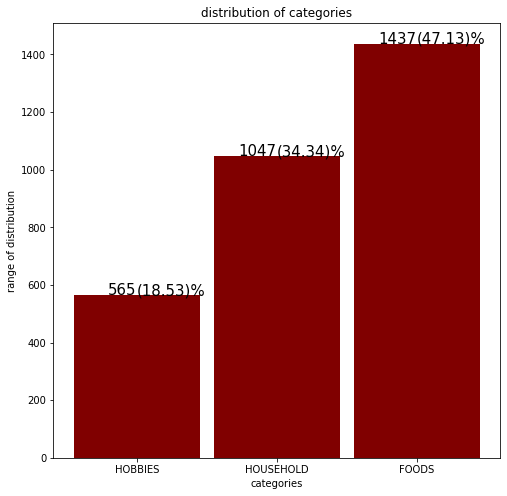

In [ ]:
per=100/unique_items
plt.figure(figsize=(8,8))
plt.bar(keys, val, color ='maroon',width=.9)
plt.bar(keys, val, color ='maroon',width=.9)
for index,data in enumerate(val):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=15),ha='right')
    plt.text(x=index , y =data , s=f"({np.round(data*per,2)})%" , fontdict=dict(fontsize=15),ha='left')

plt.title('distribution of categories')
plt.xlabel('categories')
plt.ylabel('range of distribution')
plt.show()

#observations:

we have lot of products related to food category and next category is household with 34% and least amount of items are hobbies category

#loading calendar data

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/18599/1236839/calendar.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628447621&Signature=IZ5DCyyirtCmTE71Nl7mD%2Bkjo5Tp7iFI476ejeHNyc5ysG5vdD%2BBO7P1Oitd9Vo9BnWcWhIFV8ntiSlr%2FNyWL387YfV4R%2BDk5iRqk9eN2J4LI1ZQG5nG2Whoo4l6vrPtVcdoIeABCuqGGhv8r9MHoq4lZzn6eMg6Ub7dCK8I2GvoWeJnkVgQjC00zXPSLnjf%2Bw94Stj3Eo9jmzQCmTcVUNTpzmgcbqISoo7ewVOeMGrpY3lbJ%2BGTt1aFHPRzAGykkXelmPClRN42gTe7Vr5Pv42dt3QzBjM0BJbN%2Bxzi97R6jCf7bHJ4po1BgX9kjiieoeR4EV0Rj4PfCbXUQS2Sag%3D%3D&response-content-disposition=attachment%3B+filename%3Dcalendar.csv" -c -O 'calendar.csv'


--2021-08-07 09:51:08--  https://storage.googleapis.com/kagglesdsdata/competitions/18599/1236839/calendar.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628447621&Signature=IZ5DCyyirtCmTE71Nl7mD%2Bkjo5Tp7iFI476ejeHNyc5ysG5vdD%2BBO7P1Oitd9Vo9BnWcWhIFV8ntiSlr%2FNyWL387YfV4R%2BDk5iRqk9eN2J4LI1ZQG5nG2Whoo4l6vrPtVcdoIeABCuqGGhv8r9MHoq4lZzn6eMg6Ub7dCK8I2GvoWeJnkVgQjC00zXPSLnjf%2Bw94Stj3Eo9jmzQCmTcVUNTpzmgcbqISoo7ewVOeMGrpY3lbJ%2BGTt1aFHPRzAGykkXelmPClRN42gTe7Vr5Pv42dt3QzBjM0BJbN%2Bxzi97R6jCf7bHJ4po1BgX9kjiieoeR4EV0Rj4PfCbXUQS2Sag%3D%3D&response-content-disposition=attachment%3B+filename%3Dcalendar.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103469 (101K) [text/csv]
Saving to: ‘calendar.csv’

calendar.csv        100%[===================>]

In [ ]:
calender=pd.read_csv('/content/calendar.csv')
calender.head(4)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0


In [ ]:
calender.shape,data.shape

((1969, 14), (30490, 1947))

In [ ]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [ ]:
calender.isnull().sum()   #checking the missing values

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

all nan values are in eventype columns i.e there are some days with events filled with nan ,so we need to replace nan with no events

In [ ]:
calender=calender.fillna('no_event') #replacing nan values as 'no event'
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1


Getting insights of sales from each division like state,stores,categories and departments

1.check the total daily sales happeniing in all states 

In [ ]:
days=data.columns[6:]
each_day_sale=data[days].sum().values

fig=px.line(x=calender['date'][:1941],y=each_day_sale,title='sales occured on each day',labels={'x':'years','y':'sales'})
fig.update_layout(title_x=.5)
fig.show()

#observations:

1.firstly thing observed is the pattern ,for each year it slighlty having same pattern

2.year by year sales increment in sales in slow but compare to 2011 , year 2016 as increase of sales up to range of 60k

3.At end of each year the sales are droping drastically

creating new dataframe taking up to 1941 days from calendar.csv

In [ ]:
new=pd.read_csv('/content/calendar.csv',nrows=1941)
new=new.fillna('no_event')
new['sales']=each_day_sale

new.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sales
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0,32631
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0,31749
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0,23783
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0,25412
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1,19146


In [ ]:
#creating function for average sales 
def avg_sales(input,titles,label,size):
  group=new.groupby(input).mean()  #grouping that division and finding the mean

  plt.figure(figsize=size)
  ax=sns.barplot(x=group.index,y=group['sales'])
  for p in ax.patches:
      ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=11, xytext=(0, 20),textcoords='offset points')
  plt.title(titles)
  plt.xlabel(label)
  plt.ylabel('sales')
  plt.show()

#2.sales in each state

In [ ]:
#creating the functions for daily sales,monthly sales and also barplot visulaization to know the total sales
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()

def daily_sales(input,title,xlabel,ylabel): #takes the input like stateid,storeid
  value=data.groupby(input).sum()     #do groupng for it
  states=len(value.index)             #get the indices

  for i in range(states):
    fig1.add_trace(go.Scatter(x=calender['date'][:1941],y=value.iloc[i],name=value.index[i]))
  fig1.update_layout(title=title, title_x=0.5,xaxis_title=xlabel,yaxis_title=ylabel)
 
  return fig1.show()
  


#montly sales i.e in each year we get the sales for each month in it
def month_sales(input,title,xlabel,ylabel): #takes the input

  value=data.groupby(input).sum().T  #grouping the data
  index=value.columns
  dates=new['date'].map(lambda x:x[:-3]).values  #we need to get the month-year so we removing the date from it,so that we can group the month-year combintation to get monthly sales
  value['date']=dates
  final=value.groupby('date').sum()   #finally grouping with month-year combintations(like 2001-1,2001-2,2001-3 i.e 1,2,3 are months)

  for i in index:
    fig2.add_trace(go.Scatter(x=final.index,y=final[i],name=i))
  fig2.update_layout(title=title, title_x=0.5,xaxis_title=xlabel,yaxis_title=ylabel)
  return fig2.show()


#getting barplot visualixation for overall sales 
def bar_plots(input,title,xlabel,ylabel):    
  value=data.groupby(input).sum()
  total_sales=value.iloc[:].sum(axis=1)   #summing up sales of each proudct ie consider all days sales for each item

  percents=[np.round(i*(100/sum(total_sales.values)),2) for i in total_sales.values]
  fig3=px.bar( x=total_sales.index,y=total_sales.values,color=total_sales.index,text=percents)
  fig3.update_traces(textposition='outside')
  fig3.update_layout(title=title, title_x=0.5,width=1000, height=500,xaxis_title=xlabel,yaxis_title=ylabel)
  return fig3.show()

In [ ]:
daily_sales('state_id','sales of each state','year','sales')

#observation:
1.more sales are occuring in california state than other two states

2.TX and WI has almost same sales pattern ,so in these states sales are happening in almost same range

3.in califorina sales are increasing slightly but in other two states sales are almost in same medium in eahc year

4.and at end of each year sales are droping 

In [ ]:
month_sales('state_id','monthly sales of each state','year','sales')

#observation:
1.first take away is CA state has more sales than two states 

2.in califorina,up to 2014 sales as increased but slighlty droppped in btn 2014 -2015 span and again after 2015 sales tends to increasing
 
3.TX and WI has almost same sales rate from 2013 year 

3.from 2013 TX,WI has some constant sales upto mid 2015 and then it increased slightly


In [ ]:
bar_plots('state_id','sales of each state','difeerent states','sales')

#observation:

1.CA state has high number of sales i.e nearly 30 millions whereas other two sates TX,WI has almost same percent of sales 

2.CA state records 43percent of sales  and also approx 10 percent lgreater  sales than other two states

3.therfore, califrina had higher and good sales than other states


#3.state wise sales

In [ ]:
def state_wise_sales(state_name,input,title,xlabel,ylabel):

  state=data[data['state_id']==state_name]
  value=state.groupby(input).sum()
  total_sales=value.iloc[:].sum(axis=1)

  #plt.figure(figsize=(10,10))
  percents=[np.round(i*(100/sum(total_sales.values)),2) for i in total_sales.values]
  fig=px.bar( x=total_sales.index,y=total_sales.values,color=total_sales.index,text=percents)
  fig.update_traces(textposition='outside')
  fig.update_layout(title=title, title_x=0.5,width=600, height=500,xaxis_title=xlabel,yaxis_title=ylabel)
  
  return fig.show()

In [ ]:

state_wise_sales('CA','cat_id','most happening sales category in CA','diffeerent categories','sales')
state_wise_sales('WI','cat_id','most happening sales category in WI','diffeerent categories','sales')
state_wise_sales('TX','cat_id','most happening sales category in TX','diffeerent categories','sales')

#obseravtion:
1.In CA state nearly 70 percent sales are happeing on food category and very few sales on hobbies

2.IN all states ,higher sales on food category and very less sales on housholds

3.And each state almost follling same distributio of sales for each categories


#no of products in each store

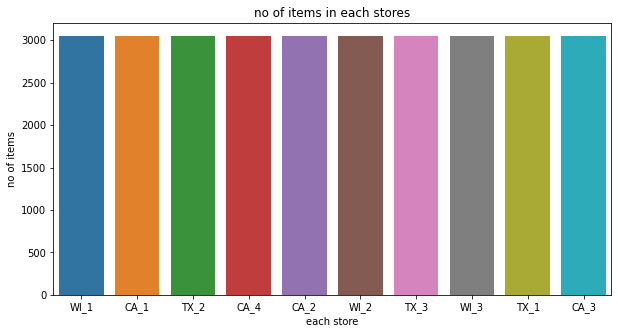

In [ ]:

#https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

#no of items present in each store
plt.figure(figsize=(10,5))
each_store=data['store_id'].value_counts()
sns.barplot(x=each_store.index,y=each_store.values)
plt.title('no of items in each stores')
plt.xlabel('each store')
plt.ylabel('no of items')
plt.show()

#storage of each category in each store

In [ ]:
store_name=pd.unique(data['store_id'])
store_name

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [ ]:
hob_item=[]
food_item=[]
hold_item=[]
for i in store_name:
  hob_item.append(len(data[(data['store_id']==i) & (data['cat_id']=='HOBBIES')]))
  food_item.append(len(data[(data['store_id']==i) & (data['cat_id']=='FOODS')]))
  hold_item.append(len(data[(data['store_id']==i) & (data['cat_id']=='HOUSEHOLD')]))

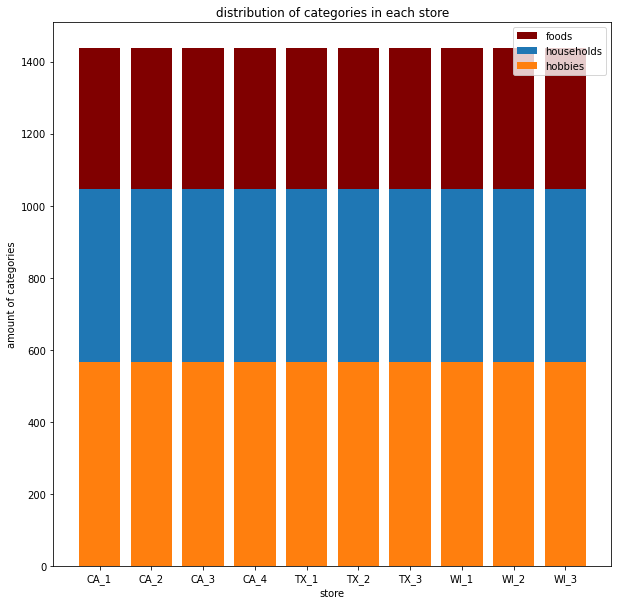

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(store_name,food_item,color='maroon',label='foods')
plt.bar(store_name,hold_item,label='households')
plt.bar(store_name,hob_item,label='hobbies')
plt.legend(loc=0)
plt.title('distribution of categories in each store')
plt.xlabel('store')
plt.ylabel('amount of categories')
plt.show()

#observation:
1.each store contains same amount of products 

2.in each store,we have 1437 food products,1047 househols and 565 hobbies so we can say that in each store majoirty of producst are food and folloed by household product and finally very low hobbies products

3.also all of stores have same distribution of three product categories

In [ ]:
month_sales('store_id','sales of each store','year','sales')

#obseravtions;

1.CA1 store has higher number of sales than other states

2.very low sales happened in CA4 store

3.rest of store except ca1 ,ca4 having low varaination in range of sales

4.and finally WI2 had good growth in sales year by year as it stated with low sales and sudden rise occured after 2012 and then had constant growth

In [ ]:
bar_plots('store_id','sales of each store','stores','sales')

#obseravtions:
1.Almost 17 percent of sales happening in ca_3 store 

2.on an average rest of stores had 8 percent of sales in each store

3.all stores in each state had almost same percent of sales with slight varaiation but only CA state stores had different sales percentage for each store

#sales in different categories

In [ ]:
month_sales('cat_id','sales of each category','year','sales')

#obseravtion:
1.lots of sales happieing on food items i.e lots of people are consuming food item more than other items

2.lots of ups and drops in sales for food items but comapre to 2011 sales has been improved

3.hobbies items had been sold very low and that too it had constant sales happeing in each year

4.coming to house hold items,there is no much deviations in sales as comapre to food sales


In [ ]:
bar_plots('cat_id','sales of each category','categories','sales')

#obseravtions;
1.totally 68 percent of food items are sold and very few item of hobbies are sold

2.only 22 percent of household item are sold

#no of products in each department

Text(0, 0.5, 'amount of categories')

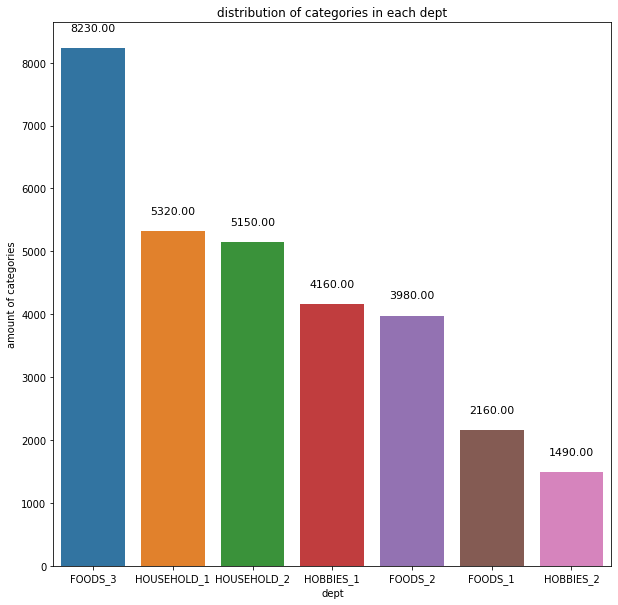

In [ ]:
#https://stackoverflow.com/questions/45946970/displaying-of-values-on-barchart

plt.figure(figsize=(10,10))
each_dept=data['dept_id'].value_counts()
ax=sns.barplot(x=each_dept.index,y=each_dept.values)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, xytext=(0, 20),textcoords='offset points')
    

plt.title('distribution of categories in each dept')
plt.xlabel('dept')
plt.ylabel('amount of categories')

#OBSERVATION:

1.as we seen that food products are more in data and coming to respective department of each category ,we had different amounts of products in each department

2.in food department,dept food3 has more no of products wheras dept food2,dept food1 has very less no of food products.

3.we had 10470 households products in total and it has two departments with almost 50percent of products in each 

4.hobbies products has vey less no of storage and it has 2 departments where dept1 has more products than dept2

#sales in difeerent departments

In [ ]:
month_sales('dept_id','sales of each department','year','sales')

#obseravtions:
1.eventhough food items are solding high only one department had higher sales than other 2 food depts

2.so there are more storage in food_1 dept ,so we got more sales in that departmemt ,sales in each deprtment is based on storage of ietms in it

3.even each houshold dept contants 50per of items ,only  hosuehold1 dept had good sales compare to household2 dept

4.and we had low storage in hobbies dept ,so we got least sales compare to all deprtments


In [ ]:
bar_plots('dept_id','sales of each department','departments','sales')

#observation:
1.Nearly 50 per of sales are from food_3 dept

2.except food_1 dept ,even we had more storage of item in houshold than 2 food depts ,more preoducts been sold in food items

3.only .81 percent of hobbies are sold

#most saled product among all states

In [ ]:
most_sales=data.groupby('item_id').sum()
most_sales=(most_sales.sum(axis=1))
most_sales=most_sales.sort_values(ascending=False)[:10]

fig=px.bar(x=most_sales.index,y=most_sales.values)
fig.update_layout(title='highest sold product', title_x=0.5,width=1000, height=500,xaxis_title='products',yaxis_title='sales')

#observation:
1.among all states,FOODS_3_090 item got nearly 1M sales

2.FOODS_3_586 ietm also had higher sales appro 1M competeting the FOODS_3_090 item
3.and top 10 highly sold items is a food category,so in each state food items are been highly sold by people

#checking which is product highly sold in each state

In [ ]:
for i in ['CA','WI','TX']:
  most_sales=data[data['state_id']==i]
  most_sales=most_sales.groupby('item_id').sum()
  most_sales=(most_sales.sum(axis=1))
  most_sales=most_sales.sort_values(ascending=False)[:10]


  fig=px.bar(x=most_sales.index,y=most_sales.values)
  fig.update_layout(title='highest sold product ',title_x=0.5,width=800, height=300,xaxis_title='products',yaxis_title='sales')
  fig.update_traces(marker_color='green',row=1,col=1)
  fig.show()

#obseravtion:

1.in each state highly sold product is Food items and almost same food products are been replacing in top 10 sales in each state(especially top 2 higly slaed products are common in each state)

2.each state had top 10 sold products are from food items   only


#checking  sale effect due to events

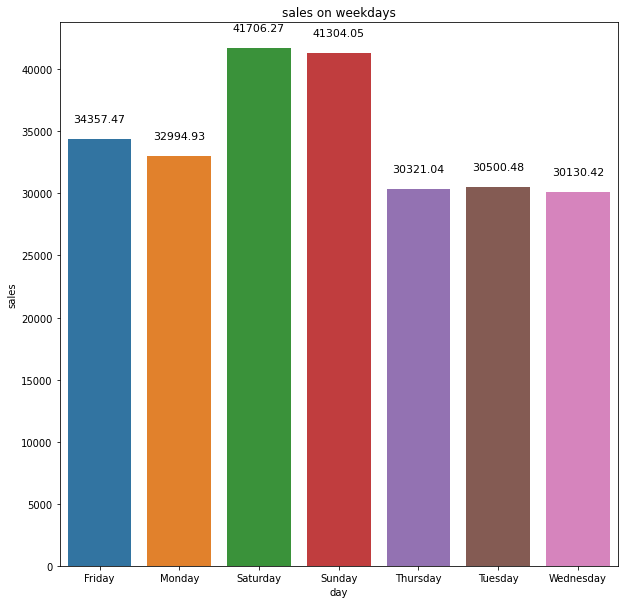

In [ ]:
avg_sales('weekday','sales on weekdays','day',size=(10,10))

#observations:
1.lot of sales are happening mostly on sunday and saturday,on friday also good amount of sales happening compare to other days except weekends

2.low sales are happeing on tuesday,wednesday and thursday

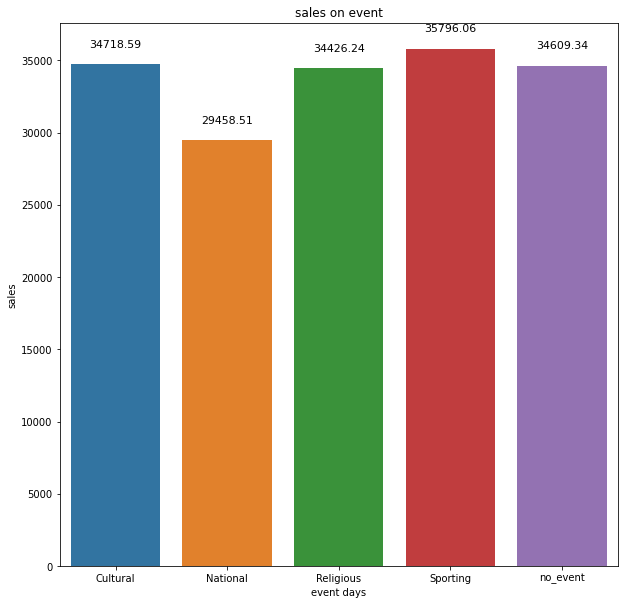

In [ ]:
avg_sales('event_type_1','sales on event','event days',size=(10,10))

#obseravtion:
1.on sporting events sales had occured slightly more than others
on natonal event,less sales occured compared to other

2.even on no event day,sales appear almost has event day so we cant get an exact conclusion that sales may ocuur more on event days


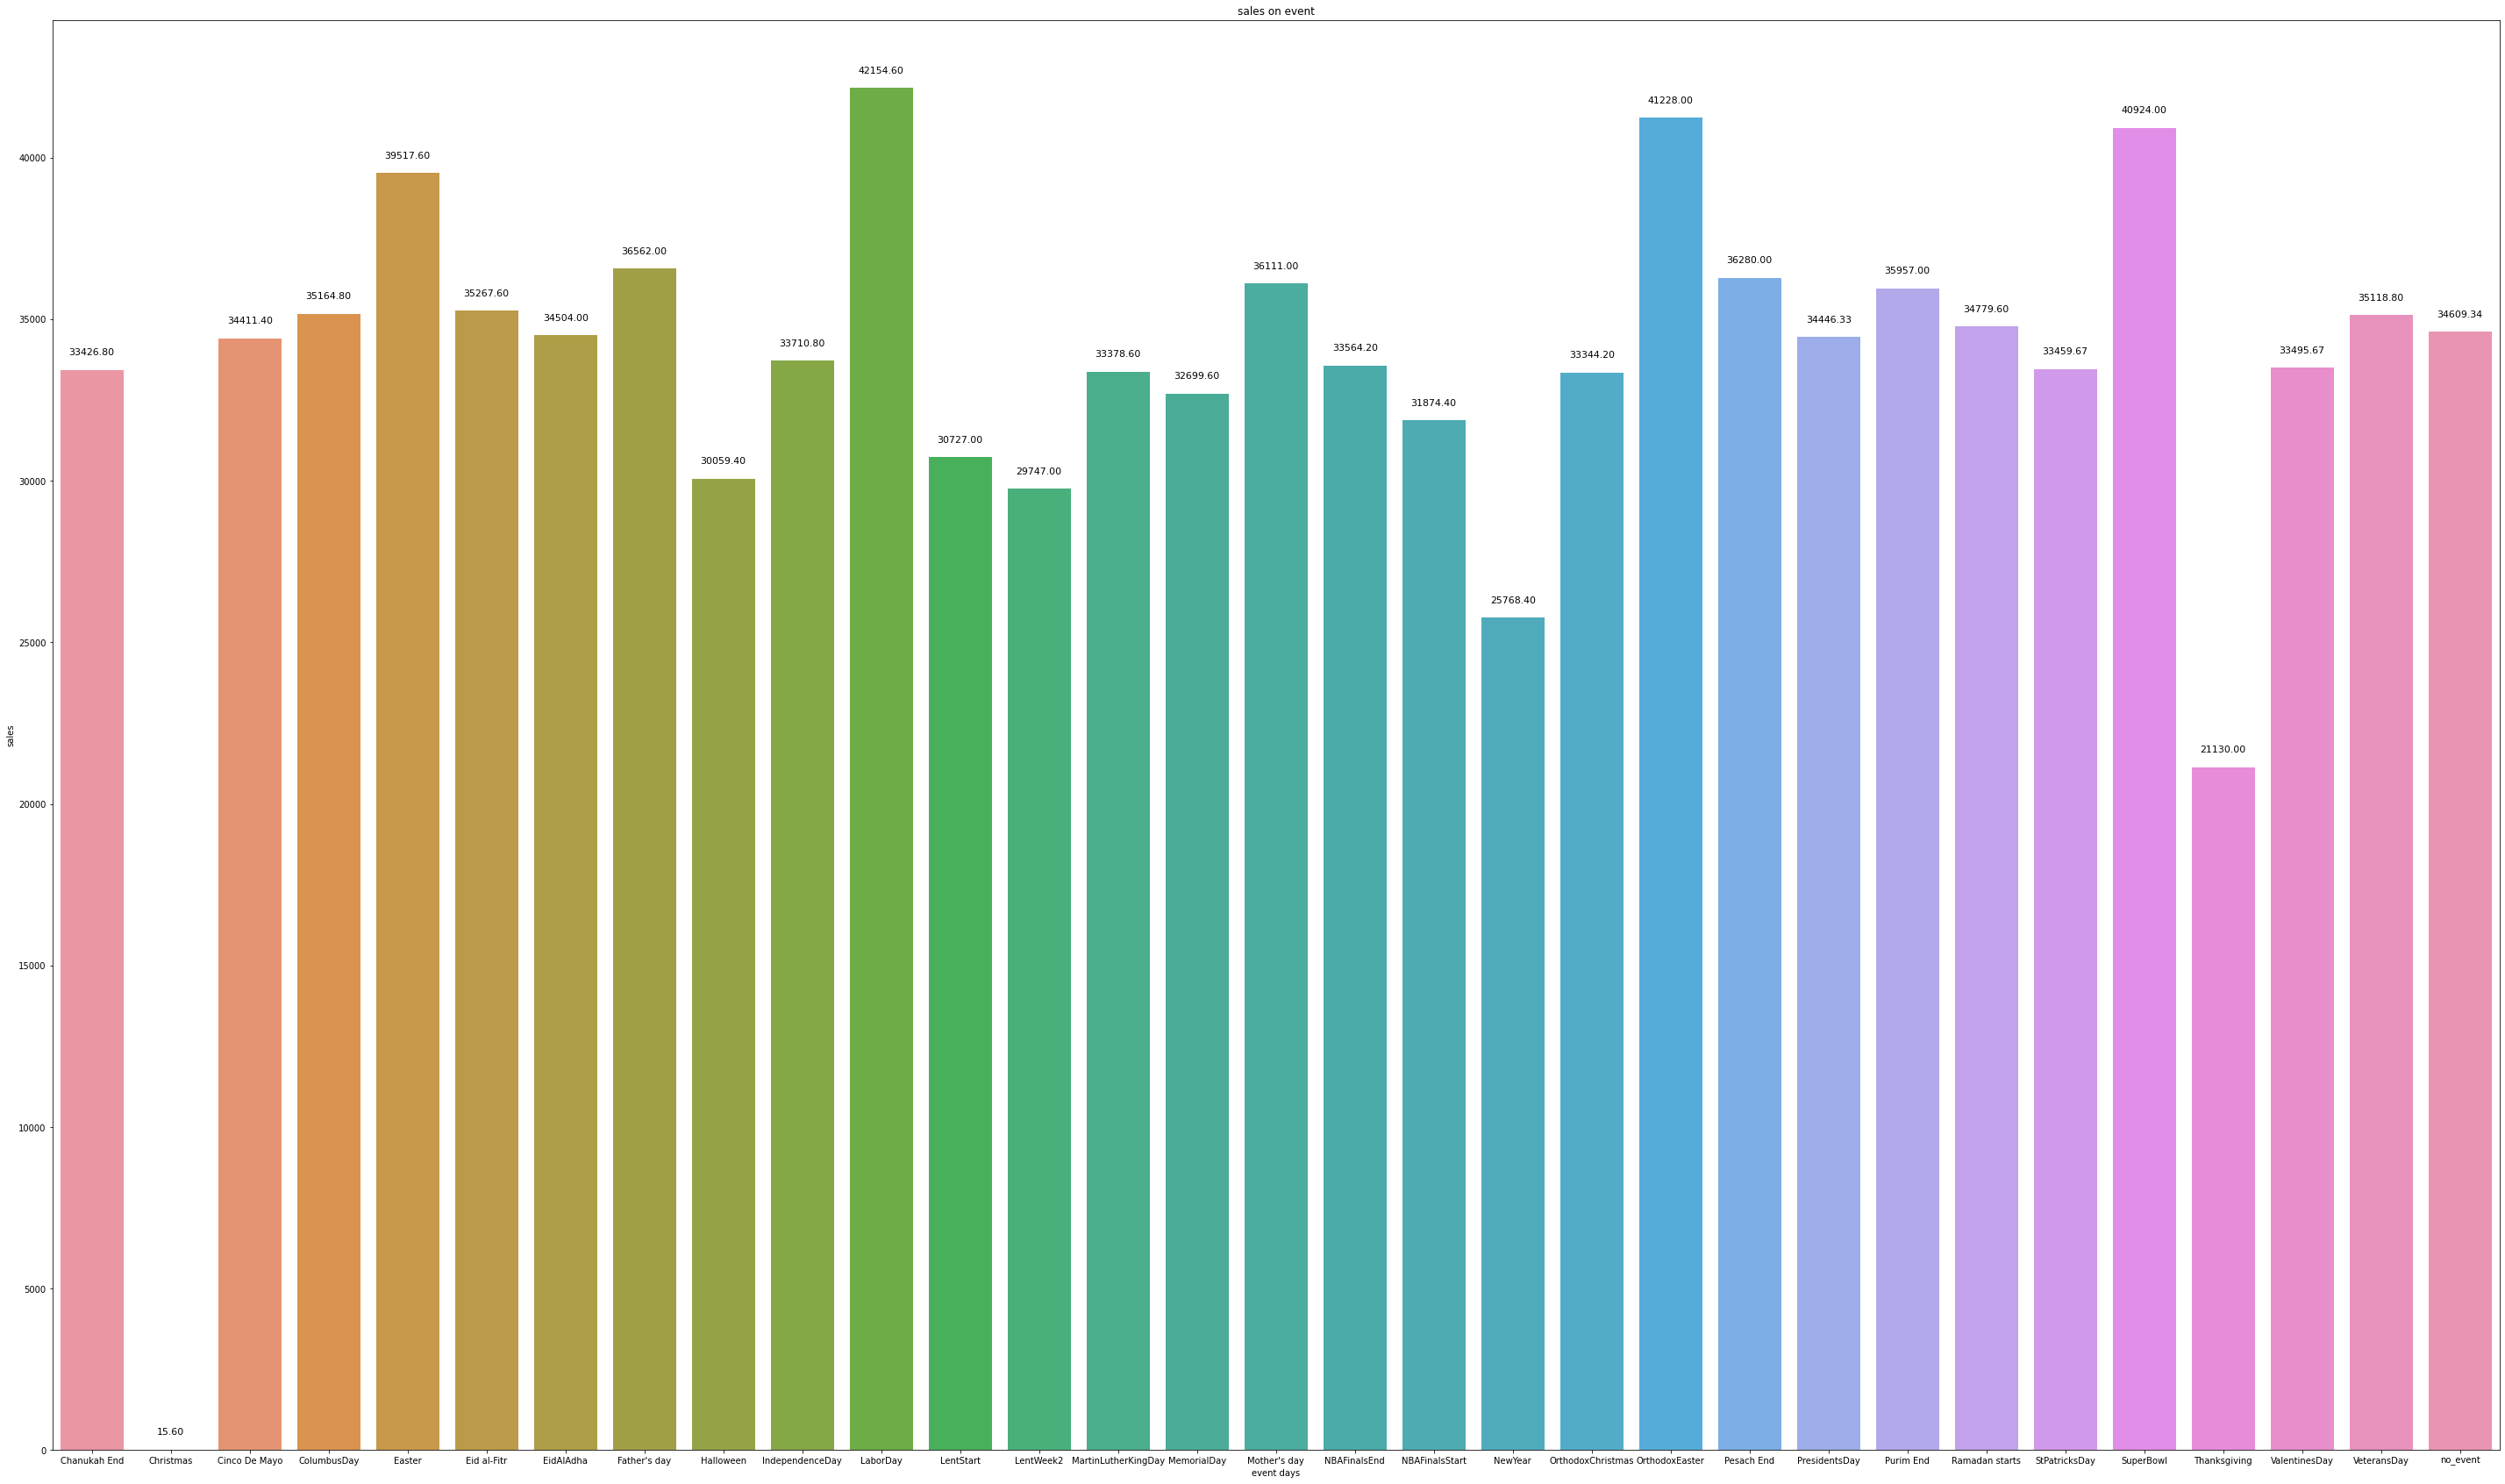

In [ ]:
avg_sales('event_name_1','sales on event','event days',size=(50,30))

#observations:

1.on average more sales happened on labours days

2.very low sales are on christmas ,reaon might be havving  festival there may be close of store or poeple may busy so got low sales than other event days

In [ ]:
snaps=data.groupby('state_id').sum().T
snaps['d']=snaps.index
snaps.head()

state_id,CA,TX,WI,d
d_1,14195,9438,8998,d_1
d_2,13805,9630,8314,d_2
d_3,10108,6778,6897,d_3
d_4,11047,7381,6984,d_4
d_5,9925,5912,3309,d_5


In [ ]:
merge=pd.merge(snaps,calender,on='d')
merge.head()

,CA,TX,WI,d,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,14195,9438,8998,d_1,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
1,13805,9630,8314,d_2,2011-01-30,11101,Sunday,2,1,2011,no_event,no_event,no_event,no_event,0,0,0
2,10108,6778,6897,d_3,2011-01-31,11101,Monday,3,1,2011,no_event,no_event,no_event,no_event,0,0,0
3,11047,7381,6984,d_4,2011-02-01,11101,Tuesday,4,2,2011,no_event,no_event,no_event,no_event,1,1,0
4,9925,5912,3309,d_5,2011-02-02,11101,Wednesday,5,2,2011,no_event,no_event,no_event,no_event,1,0,1


In [ ]:
merge['CA'][merge['snap_CA']==1].mean()

15823.4234375

In [ ]:
def avg_sales_snap(input):
  val_1=merge[input][merge['snap_'+input]==1].mean()
  val_0=merge[input][merge['snap_'+input]==0].mean()

  return val_1,val_0

In [ ]:
from plotly.subplots import make_subplots

states=['CA','TX','WI']
snaps=['snap','no-snap']
val=[]
for i in states:
  x,y=avg_sales_snap(i)
  val.append([x,y])



fig = make_subplots(rows=1, cols=3,subplot_titles=["CA",'TX','WI'],row_titles=['Average sales'])

fig.add_trace(go.Bar(x=snaps,y=val[0]),1,1)
fig.add_trace(go.Bar(x=snaps,y=val[1]),1,2)
fig.add_trace(go.Bar(x=snaps,y=val[2]),1,3)

fig.update_layout(title='average sales of each state on snap purchase',title_x=0.5,width=800, height=400,xaxis_title='different states',yaxis_title='avg sales')
fig.show()


#observations:

1.more avg sales had been generated on CA state compare to others

2.as snap purchase is meant for low and no icome people,so the sales are higher on snap purchase day

#sale price

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/compressed/sell_prices.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628589185&Signature=nRdZBjzo%2Bj3GgOM6GTcUf8XkCm%2B8w9YkECbxInBkJEF5yGxpIJCvGY3RIWZsy8vuPREisBddXEB2Gy0s1idJtXo0FrVd2JSQLpJAYvz67%2B96qmTXunQ9OGu38YQxl5AvaJPAoDECqq0tH2prDa%2BJH8uBVERbBrQ32Ivkp3Yyaluwli22D6vmnNgIDEsDZJcL2ufgiTLIu2tAGxewA7HBLB98xzRUf6qMYdwcn8pGN0omkSu5uiUqxRQhAEFTXXNBv%2FUvAGoFiY6Oeq7uctUsCa7qmcWiY%2FEC%2F%2Fnx%2BSQR9KW%2BJhve7aTJvtKDUhdFYacZBOFnfbjbxfizJJIOM%2BlpHA%3D%3D&response-content-disposition=attachment%3B+filename%3Dsell_prices.csv.zip" -c -O 'sell_prices.csv.zip'

--2021-08-07 09:53:33--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/compressed/sell_prices.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628589185&Signature=nRdZBjzo%2Bj3GgOM6GTcUf8XkCm%2B8w9YkECbxInBkJEF5yGxpIJCvGY3RIWZsy8vuPREisBddXEB2Gy0s1idJtXo0FrVd2JSQLpJAYvz67%2B96qmTXunQ9OGu38YQxl5AvaJPAoDECqq0tH2prDa%2BJH8uBVERbBrQ32Ivkp3Yyaluwli22D6vmnNgIDEsDZJcL2ufgiTLIu2tAGxewA7HBLB98xzRUf6qMYdwcn8pGN0omkSu5uiUqxRQhAEFTXXNBv%2FUvAGoFiY6Oeq7uctUsCa7qmcWiY%2FEC%2F%2Fnx%2BSQR9KW%2BJhve7aTJvtKDUhdFYacZBOFnfbjbxfizJJIOM%2BlpHA%3D%3D&response-content-disposition=attachment%3B+filename%3Dsell_prices.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14916601 (14M) [application/zip]
Saving to: ‘sell_prices.csv.zip

In [ ]:
!unzip /content/sell_prices.csv.zip

Archive:  /content/sell_prices.csv.zip
  inflating: sell_prices.csv         


In [ ]:
sell_price=pd.read_csv('/content/sell_prices.csv')

sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
def avg_price(input,xlabel,title):

  price=sell_price.groupby(input).mean()

  fig=px.bar(x=price.index,y=price['sell_price'])
  fig.update_layout(title=title,title_x=0.5,width=800, height=400,xaxis_title=xlabel,yaxis_title='avg price')
  fig.show()


In [ ]:
sell_price['cat_id']=sell_price['item_id'].map(lambda x :x.split('_')[0])
sell_price.head()

,store_id,item_id,wm_yr_wk,sell_price,cat_id
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES


In [ ]:
avg_price('cat_id' ,'different category','categories')

#obseravtions:
1.on an avg from all states,food ietm had very low mean price than other products

2.households and hobbies had  almost 2 times higher avg price than food items 

3.as food mean price is low,so this can also be a reason for higher sales in food 

#top 10 highest priced product

In [ ]:
def top_10(level,title):
  if level=='high':
    level=False
  else:
    level=True
  high_price=sell_price.sort_values(by='sell_price',ascending=level)
  high_price=high_price[['item_id','sell_price']]
  high_price=high_price.drop_duplicates(subset =['item_id'])
  high_price=high_price.drop_duplicates(subset =['sell_price'])[:10]

  plt.figure(figsize=(20,5))
  sns.barplot(x=high_price['item_id'],y=high_price['sell_price'])
  plt.xlabel('products')
  plt.ylabel('prices')
  plt.title(title)
  plt.show()


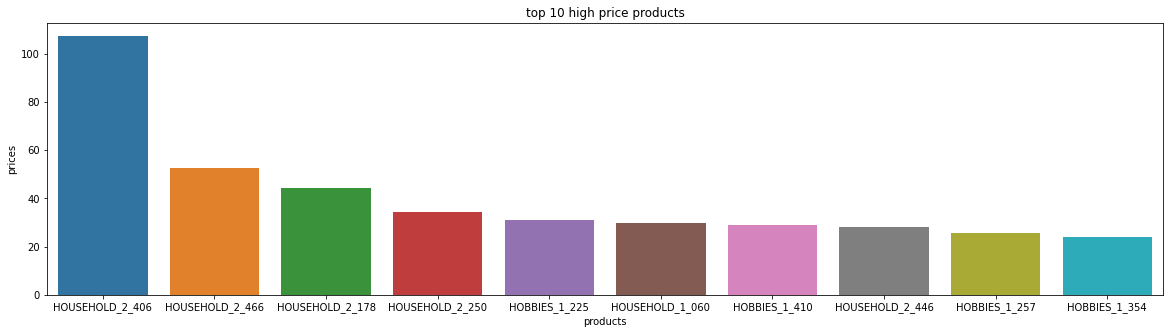

In [ ]:
top_10('high','top 10 high price products')

#observations:
1.Highest price of item is recorded for household categorty producta and almost top 10 highly priced proudcts are under household and hobbies

2.So,as household,hobbies prices are high ,so this may lead to low sales in overall comapre to food items

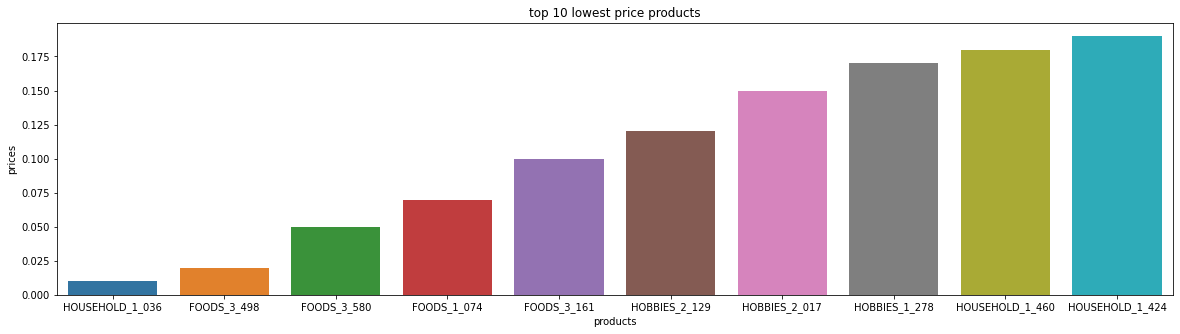

In [ ]:
top_10('low','top 10 lowest price products')


#obesrvations:

1.least priced product is household category and most of items having least items are food categories ,so this might be reaosn for good and higher sales than other categories

2.even some of housholds had lower price but still didnt got higher sales becoasue overall mean price is higher comapre to food items i.e lot of food item had ver less price than household,hobbies items 

#price variation of highest sold product

In [ ]:
days=data.columns[6:]
each_day_sale=data[days].mean().values

caly=pd.read_csv('/content/calendar.csv',nrows=1941,usecols=['date','wm_yr_wk'])
caly['sales']=each_day_sale

dates=caly['date'].map(lambda x:x[:-3]).values
caly['month_wise']=dates

caly.head()

,date,wm_yr_wk,sales,month_wise
0,2011-01-29,11101,1.070220,2011-01
1,2011-01-30,11101,1.041292,2011-01
2,2011-01-31,11101,0.780026,2011-01
3,2011-02-01,11101,0.833454,2011-02
4,2011-02-02,11101,0.627944,2011-02


In [ ]:
def sold_items(no_of_items,highly_sold):
  if highly_sold:
    val=False
  else:
    val=True

  most_sales=data.groupby('item_id').sum()
  most_sales=(most_sales.sum(axis=1))
  most_sales=most_sales.sort_values(ascending=val)[:no_of_items]

  return most_sales.index


In [ ]:
 fig=go.Figure()
def sale_vs_price(item_id):

  item_data=sell_price[sell_price['item_id']==item_id]
  item_one=pd.merge(item_data,caly,on='wm_yr_wk')
  item_one=item_one.groupby('month_wise').sum()

  fig.add_trace(go.Scatter(x=item_one.index, y=item_one['sell_price'],mode='lines',name='price'))
  fig.add_trace(go.Scatter(x=item_one.index, y=item_one['sales'],mode='lines',name='sales'))
 
  fig.update_layout(title='avg sales of a product for price', title_x=0.5,xaxis_title='year',yaxis_title='sales vs price')

  print('item is ',item_id)
  fig.show()



#average sales of higly sold product for given price of each month

In [ ]:
highly_sold_items=sold_items(1,highly_sold=True)
highly_sold_items

Index(['FOODS_3_090'], dtype='object', name='item_id')

In [ ]:
sale_vs_price(items[0])

item is  FOODS_3_090


#obseravtions;

1.checking the price and avg sale flucation of highly sold item i.e FOODS_3_090

2.at some points we can observe slight increase in svg sales when price is decreased

2.in between 2013-2014 as due to lower price of this item there is sudden rise in sales,so there may be sales which are also depends on price of that product

#final observaton from EDA:

1.from anaylsi of sales across states and stores ,it been observed that sales are increasing slightly and had almost had same patterns for each year ,finally sales are also dropped at end of year 

2.most of slaes are been happeing on California state and WI,TX had almost same sales growth over years i,e overlapping of sales pattern

3.Sales are been more on saturday ,sunday and had some lower sales from tuesday to thursday

4.Food items are been generating more revenue in all states

5.As ther is high storage of food categories in departmentb than other catgores so food items had been sold more and got good sales than others

6.from 2011 to 2016 ,sales have been increased 

7.there very less sales in chirtsmas event compare to other event day sales ,and also at time of snap purchase sales are slightly higher than non snap time

8.Across all states avergae price of food items are very less than others ,so this is also factor for increasing the food revenue

9.sales has been increased on sport and cultural event types ,addition to this sales on no event type are also appro same 

10.highly priced items are recored mostly for house holdss and hobiies categorie and very least priced items are from foood cateogories so this can also one of factore for generating revenuce for food items


